# Project: 
# Exploratory Data Analysis (EDA) 
#on SampleSuperStore 

#### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Loading to dataframe

In [2]:
data_url = "/content/drive/MyDrive/Spark/SampleSuperstore.csv"
df = pd.read_csv(data_url)

df.head()


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


#EDA

In [3]:
print("Shape before deleting duplicate values: {}.\n\n".format(df.shape))

Shape before deleting duplicate values: (9994, 13).




In [4]:
# Removing duplicate rows if any
df=df.drop_duplicates()
print("Shape After deleting duplicate values: {}.\n\n".format(df.shape))


Shape After deleting duplicate values: (9977, 13).




# get how many countries 

In [5]:
df["Country"].value_counts()

United States    9977
Name: Country, dtype: int64

## conclusion the column countries can be droped 

## get how many Segment

In [6]:
df["Segment"].value_counts()

Consumer       5183
Corporate      3015
Home Office    1779
Name: Segment, dtype: int64

## conclusion threre is 3 categories of Segment

#### CHECK THE MISSING VALUE

In [7]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [8]:
#Statistical details
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.000000,9977.00000
mean,55154.964117,230.148902,3.790719,0.156278,28.69013
std,32058.266816,623.721409,2.226657,0.206455,234.45784
min,1040.000000,0.444000,1.000000,0.000000,-6599.97800
25%,23223.000000,17.300000,2.000000,0.000000,1.72620
50%,55901.000000,54.816000,3.000000,0.200000,8.67100
75%,90008.000000,209.970000,5.000000,0.200000,29.37200
max,99301.000000,22638.480000,14.000000,0.800000,8399.97600


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9977 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9977 non-null   object 
 1   Segment       9977 non-null   object 
 2   Country       9977 non-null   object 
 3   City          9977 non-null   object 
 4   State         9977 non-null   object 
 5   Postal Code   9977 non-null   int64  
 6   Region        9977 non-null   object 
 7   Category      9977 non-null   object 
 8   Sub-Category  9977 non-null   object 
 9   Sales         9977 non-null   float64
 10  Quantity      9977 non-null   int64  
 11  Discount      9977 non-null   float64
 12  Profit        9977 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1.1+ MB


# comparing other features to profit, sales and quantities

## 1. Ship Mode

####Which shipping mode does customer choose based on the products category and the quantity?

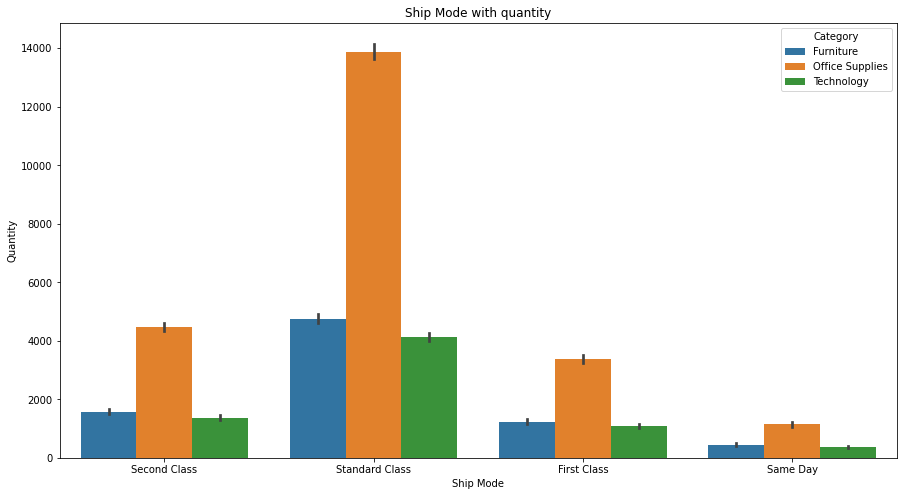

In [10]:
fig,ax=plt.subplots(figsize=(15,8))

sns.barplot(data=df,x='Ship Mode',y='Quantity',hue='Category', estimator=sum)
ax.set_title('Ship Mode with quantity')
plt.show()

In [11]:
ship_df = pd.DataFrame(df.groupby(['Ship Mode'])[['Profit','Sales', 'Quantity']].sum())
ship_df

,Profit,Sales,Quantity
Ship Mode,,,
First Class,48953.6561,3.513805e+05,5690
Same Day,15871.8869,1.283217e+05,1956
Second Class,57446.6516,4.591770e+05,7418
Standard Class,163969.2280,1.357316e+06,22756


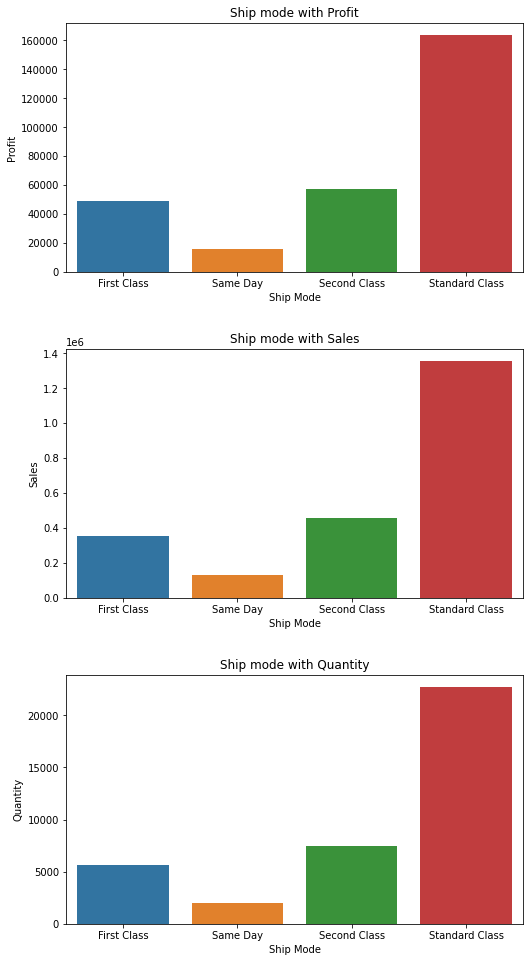

In [12]:
fig, axes = plt.subplots(3,1, figsize=(8,14))

axes[0].set_title("Ship mode with Profit")
axes[1].set_title("Ship mode with Sales")
axes[2].set_title("Ship mode with Quantity")

sns.barplot(x=ship_df.index,y=ship_df['Profit'],data= ship_df, ax = axes[0]);
sns.barplot(x=ship_df.index,y=ship_df['Sales'],data= ship_df, ax = axes[1]);
sns.barplot(x=ship_df.index,y=ship_df['Quantity'],data= ship_df, ax = axes[2]);
plt.tight_layout(pad=3);


### ==>> So the customers prefer to choose Standard mode for shipping and office supplies is the most demanded in all gategories

### Standard class ship-mode is more preferred

## 2. Segment

In [13]:
segment_df = pd.DataFrame(df.groupby(['Segment'])[['Profit', 'Sales', 'Quantity']].sum())
segment_df

,Profit,Sales,Quantity
Segment,,,
Consumer,134007.4413,1.160833e+06,19497
Corporate,91954.9798,7.060701e+05,11591
Home Office,60279.0015,4.292927e+05,6732


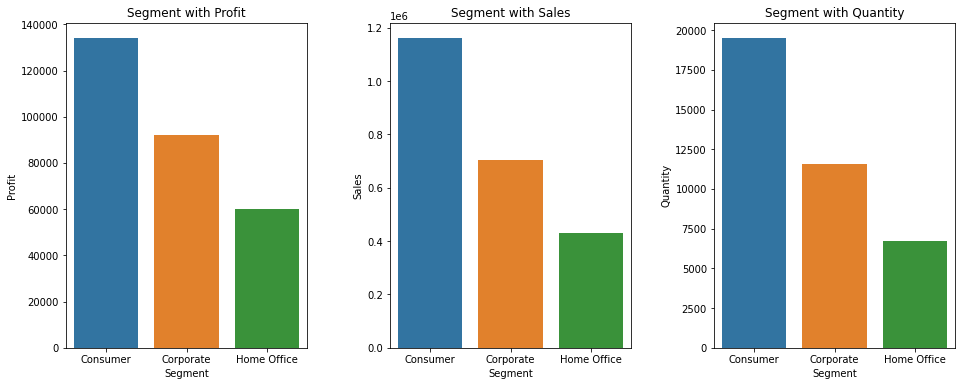

In [14]:
fig, axes = plt.subplots(1,3, figsize=(14,6))

axes[0].set_title("Segment with Profit")
axes[1].set_title("Segment with Sales")
axes[2].set_title("Segment with Quantity")

sns.barplot(x=segment_df.index,y=segment_df['Profit'],data= segment_df, ax = axes[0]);
sns.barplot(x=segment_df.index,y=segment_df['Sales'],data= segment_df, ax = axes[1]);
sns.barplot(x=segment_df.index,y=segment_df['Quantity'],data= segment_df, ax = axes[2]);
plt.tight_layout(pad=3);


### ==> so the most profit comes from cusnsumer then corporate and finally home office 

### 3. Cities

In [15]:
cities_df = pd.DataFrame(df.groupby(['City'])[['Profit', 'Sales', 'Quantity']].sum().sort_values('Profit',ascending = False))
max = cities_df.head(10)
min = cities_df.tail(10)

In [16]:
most_least_profit = max.append(min)


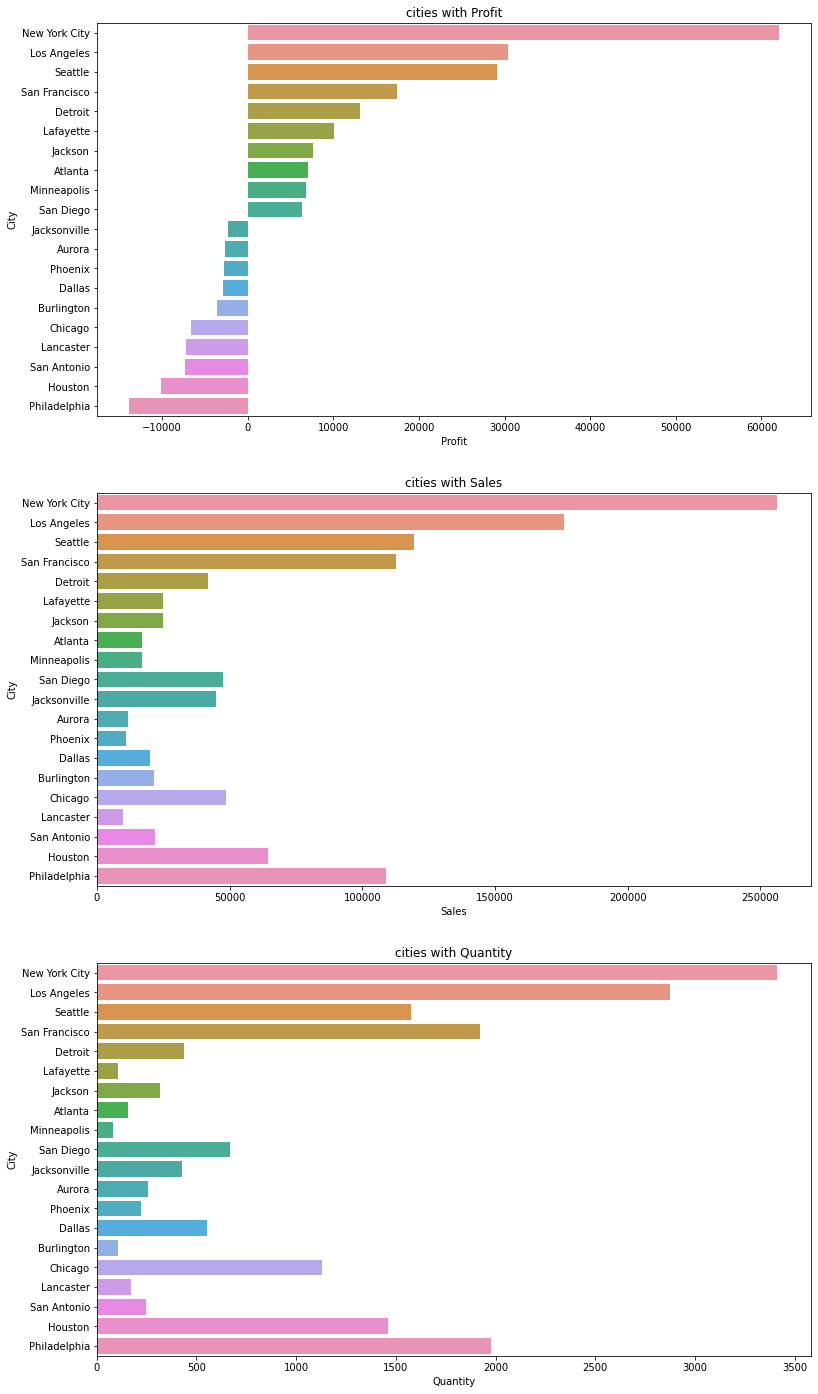

In [17]:
fig, axes = plt.subplots(3,1, figsize=(12,20))

axes[0].set_title("cities with Profit")
axes[1].set_title("cities with Sales")
axes[2].set_title("cities with Quantity")

sns.barplot(y=most_least_profit.index,x=most_least_profit['Profit'],data= most_least_profit, ax = axes[0]);
sns.barplot(y=most_least_profit.index,x=most_least_profit['Sales'],data= most_least_profit, ax = axes[1]);
sns.barplot(y=most_least_profit.index,x=most_least_profit['Quantity'],data= most_least_profit, ax = axes[2]);
plt.tight_layout(pad=3);


### ==> So New York have the most sales and profit
### Philadelphia and Houston profit at these places is in negative.

## 4. Region

In [18]:
region_df = pd.DataFrame(df.groupby(['Region'])[['Profit', 'Sales', 'Quantity']].sum())
region_df

,Profit,Sales,Quantity
Region,,,
Central,39655.8752,500782.8528,8768
East,91506.3092,678435.1960,10609
South,46749.4303,391721.9050,6209
West,108329.8079,725255.6365,12234


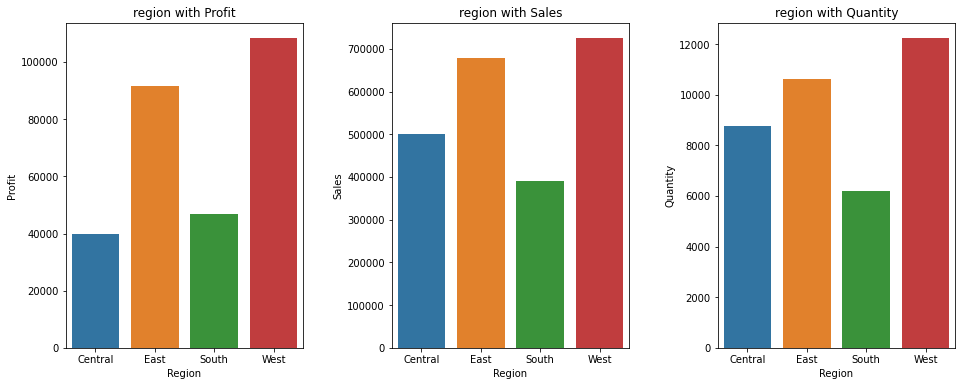

In [19]:
fig, axes = plt.subplots(1,3, figsize=(14,6))

axes[0].set_title("region with Profit")
axes[1].set_title("region with Sales")
axes[2].set_title("region with Quantity")

sns.barplot(x=region_df.index,y=region_df['Profit'],data= region_df, ax = axes[0]);
sns.barplot(x=region_df.index,y=region_df['Sales'],data= region_df, ax = axes[1]);
sns.barplot(x=region_df.index,y=region_df['Quantity'],data= region_df, ax = axes[2]);
plt.tight_layout(pad=3);


### ==> so west and east region has more profit

In [20]:
new_df = df [df['Region']=='West']

west_df = pd.DataFrame(new_df.groupby(['Sub-Category','State'])[['Profit', 'Sales', 'Quantity']].sum().sort_values('Profit',ascending = False))
west_df

,,Profit,Sales,Quantity
Sub-Category,State,,,
Accessories,California,11095.6565,37255.010,568
Binders,California,10002.1537,28473.168,1057
Copiers,Washington,9442.4242,20249.830,17
Paper,California,7949.9887,16699.750,1081
Copiers,California,7889.8519,24559.520,60
...,...,...,...,...
Tables,Oregon,-1048.8971,1671.860,18
Binders,Arizona,-1646.7484,2185.353,155
Tables,Arizona,-2281.8701,3995.350,36


## 5.Category

In [21]:
category_df = pd.DataFrame(df.groupby(['Category'])[['Profit', 'Sales', 'Quantity']].sum())
category_df

,Profit,Sales,Quantity
Category,,,
Furniture,18421.8137,741306.3133,8020
Office Supplies,122364.6608,718735.2440,22861
Technology,145454.9481,836154.0330,6939


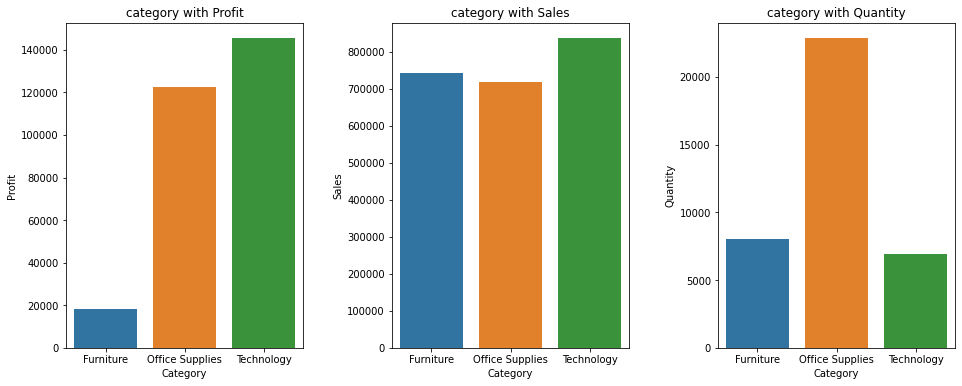

In [22]:
fig, axes = plt.subplots(1,3, figsize=(14,6))

axes[0].set_title("category with Profit")
axes[1].set_title("category with Sales")
axes[2].set_title("category with Quantity")

sns.barplot(x=category_df.index,y=category_df['Profit'],data= category_df, ax = axes[0]);
sns.barplot(x=category_df.index,y=category_df['Sales'],data= category_df, ax = axes[1]);
sns.barplot(x=category_df.index,y=category_df['Quantity'],data= category_df, ax = axes[2]);
plt.tight_layout(pad=3);


### ==> even though quantitity is less , but technology has the  highest  sales and profit 

## 6. Sub-category

In [23]:
sub_category_df = pd.DataFrame(df.groupby(['Sub-Category'])[['Profit', 'Sales', 'Quantity']].sum())
sub_category_df

,Profit,Sales,Quantity
Sub-Category,,,
Accessories,41936.6357,167380.3180,2976
Appliances,18138.0054,107532.1610,1729
Art,6524.6118,27107.0320,2996
Binders,30228.0003,203409.1690,5971
Bookcases,-3472.5560,114879.9963,868
Chairs,26567.1278,327777.7610,2351
Copiers,55617.8249,149528.0300,234
Envelopes,6964.1767,16476.4020,906
Fasteners,949.5182,3024.2800,914


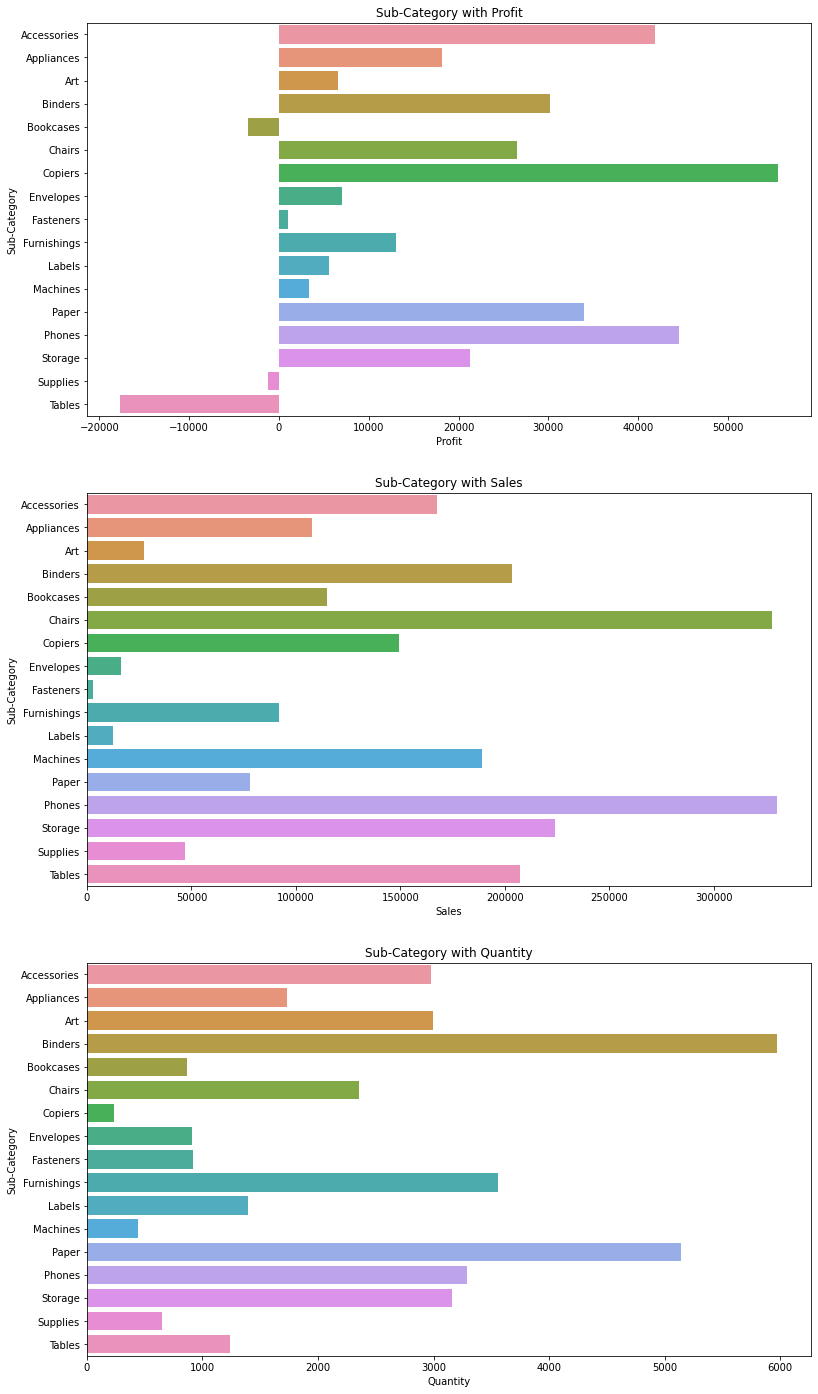

In [24]:
fig, axes = plt.subplots(3,1, figsize=(12,20))

axes[0].set_title("Sub-Category with Profit")
axes[1].set_title("Sub-Category with Sales")
axes[2].set_title("Sub-Category with Quantity")

sns.barplot(y=sub_category_df.index,x=sub_category_df['Profit'],data= sub_category_df, ax = axes[0]);
sns.barplot(y=sub_category_df.index,x=sub_category_df['Sales'],data= sub_category_df, ax = axes[1]);
sns.barplot(y=sub_category_df.index,x=sub_category_df['Quantity'],data= sub_category_df, ax = axes[2]);
plt.tight_layout(pad=3);


### ==> So copiers, accesories and phones have the max  profit and of the most sales.

# Conclusions

- Copier has maximum amount of profit and chair has the maximum amount of sales
- Standard class ship-mode is more preferred
- the most profit comes from cusnsumer then corporate and finally home office
- New York have the most sales and profit
- Philadelphia and Houston profit is in negative.


## to make more profit

---
- marketing strategy has to target or be more focus on  consumers
- strategy should focus more on east and west region
- Focus on Technology category specially Phones and accessories 
- less profitable products like tables , bookcases and suppplies result in losses so a market strategy for these  products should be changed 